In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/cabaventa.csv')
df = df[[x for x in df.columns if "Unnamed" not in x]] #saco una columnas que están mal. 

1) Son todas operaciones de venta (columna sin sentido)

In [2]:
df.operation_type.value_counts()

Venta    183810
Name: operation_type, dtype: int64

2) Las columnas **l1** y **l2** no tiene sentido mantenerlas

In [3]:
print("Países incluidos en la muestra: \n", df.l1.value_counts())
print()
print("Distritos incluidos en la muestra: \n", df.l2.value_counts())

Países incluidos en la muestra: 
 Argentina    183810
Name: l1, dtype: int64

Distritos incluidos en la muestra: 
 Capital Federal    183810
Name: l2, dtype: int64


3) Hay que pasar todo a dólares usando tipo de cambio de la fecha. 

In [4]:
df.currency.value_counts()

USD    179806
ARS       330
Name: currency, dtype: int64

Antes de cualquier conversión evaluaría si los datos de precio en pesos no estan muy sucios (y si son realmente necesarios). A primera vista hay errores claros en varios registros (precio, property type)

In [5]:
df[df.currency=="ARS"]

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
120,vbQ7BfTEPrIput6buZchUA==,Propiedad,2021-03-21,2021-03-25,2021-03-21,-34.630149,-58.408166,Argentina,Capital Federal,NaN,...,NaN,37.0,32.0,111000000.0,ARS,Mensual,Departamento venta,EDIFICIO MODERNO A ESTRENAR EN PARQUE PATRICIO...,Departamento,Venta
334,T1oZNK16P6mez/weEDYqgw==,Propiedad,2020-06-09,2020-10-26,2020-06-09,NaN,NaN,Argentina,Capital Federal,Palermo,...,NaN,300.0,280.0,700000.0,ARS,NaN,VENDO FONDO DE COMERCIO -SALON DE EVENTOS -PAL...,EXCELENTE LOCAL 2 PLANTAS EN ESQUINA -PERFECTA...,Otro,Venta
335,Ug4iPfizKVjIiNXV97f26Q==,Propiedad,2020-06-09,2020-09-05,2020-06-09,-34.590858,-58.399459,Argentina,Capital Federal,Recoleta,...,2.0,NaN,NaN,350000.0,ARS,NaN,Departamento · 114m² · 5 Ambientes,Larrea y French. Impecable. Todo reciclado a n...,Departamento,Venta
336,gRPv2W6czbVyK4VbgA1i+A==,Propiedad,2020-06-09,2020-06-15,2020-06-09,-34.619669,-58.372651,Argentina,Capital Federal,San Telmo,...,NaN,60.0,60.0,700000.0,ARS,Mensual,Fondo de Comercio - Restaurante - San Telmo,"NEGOZONA<br><br>Compra, venta y valuación de f...",Local comercial,Venta
900,1OzAcIdwe1hU2fg6NABdTw==,Propiedad,2020-06-20,2020-08-21,2020-06-20,-34.559541,-58.465854,Argentina,Capital Federal,Belgrano,...,NaN,NaN,NaN,1800000.0,ARS,NaN,vendo fondo de comercio gastronomico PARRILLA ...,"EXCELENTE OPORTUNIDAD, LOCAL SOBRE LOTE PROPIO...",Otro,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176529,oFuWfG6vSi3hlpfW8lqTRw==,Propiedad,2021-02-08,9999-12-31,2021-02-08,-32.456247,-60.884202,Argentina,Capital Federal,NaN,...,NaN,230.0,NaN,450000.0,ARS,Mensual,Dos lotes en Maciel,Ubicado en la esquina de corrientes y tucuman....,Lote,Venta
176530,3Dp04I2v+r0aarZAet8Rww==,Propiedad,2021-02-08,2021-02-08,2021-02-08,-34.620311,-58.429704,Argentina,Capital Federal,Caballito,...,1.0,NaN,NaN,19120000.0,ARS,Mensual,"Departamento en Venta en Caballito, Capital fe...",VENTA DEPARTAMENTO 2 AMBIENTES CABALLITO\nUnid...,Departamento,Venta
176531,LtDIBw20FvqH0Qs/a2epYQ==,Propiedad,2021-02-08,9999-12-31,2021-02-08,-34.620311,-58.429704,Argentina,Capital Federal,Caballito,...,1.0,NaN,NaN,19120000.0,ARS,NaN,"Departamento en Venta en Caballito, Capital fe...",VENTA DEPARTAMENTO 2 AMBIENTES CABALLITO\nUnid...,Departamento,Venta
183308,wo4n8IL8/ZpDyryH031quQ==,Propiedad,2020-12-04,9999-12-31,2020-12-04,-34.561137,-58.473743,Argentina,Capital Federal,Coghlan,...,1.0,70.0,70.0,25000000.0,ARS,Mensual,VENTA EMPRESA / FONDO DE COMERCIO LOCAL / TIEN...,Se vende exitosa empresa de venta de instrumen...,Local comercial,Venta


In [6]:
df[['price', 'property_type', 'title', 'description', 'property_type', 'operation_type']][df["currency"]=="ARS"].head()

,price,property_type,title,description,property_type,operation_type
120,111000000.0,Departamento,Departamento venta,EDIFICIO MODERNO A ESTRENAR EN PARQUE PATRICIO...,Departamento,Venta
334,700000.0,Otro,VENDO FONDO DE COMERCIO -SALON DE EVENTOS -PAL...,EXCELENTE LOCAL 2 PLANTAS EN ESQUINA -PERFECTA...,Otro,Venta
335,350000.0,Departamento,Departamento · 114m² · 5 Ambientes,Larrea y French. Impecable. Todo reciclado a n...,Departamento,Venta
336,700000.0,Local comercial,Fondo de Comercio - Restaurante - San Telmo,"NEGOZONA<br><br>Compra, venta y valuación de f...",Local comercial,Venta
900,1800000.0,Otro,vendo fondo de comercio gastronomico PARRILLA ...,"EXCELENTE OPORTUNIDAD, LOCAL SOBRE LOTE PROPIO...",Otro,Venta


4. La columna price_period tampoco tiene sentido???? (verrrrrr tema nulos)

In [7]:
df.price_period.value_counts()

Mensual    88720
Name: price_period, dtype: int64

5. La columna ad_type tampoco tiene sentido

In [8]:
df.ad_type.value_counts()

Propiedad    183810
Name: ad_type, dtype: int64

6. La columna operation_type tampoco

In [9]:
df.operation_type.value_counts()

Venta    183810
Name: operation_type, dtype: int64

7. Ver qué hacer con los casos cuyo valor en property_type == "Casa de campo"

Hay casos de viviendas que aparecen en capital pero corresponden a publicaciones fake o casos en los que es incorrecto el valor que tiene y hay que re-imputarlo. 

In [10]:
df.property_type.value_counts()

Departamento       134044
PH                  13581
Casa                 8743
Lote                 7324
Local comercial      6745
Oficina              5886
Cochera              5188
Otro                 1546
Depósito              745
Casa de campo           8
Name: property_type, dtype: int64

In [11]:
for text in df[df.property_type=="Casa de campo"]['description']: 
    print(text,"\n","*"*25)

Venta de Quinta 2 DORMITORIOS, baño, living, cocina comedor, parrilla, sobre lote de 10 mts de frente por 35 mts de fondo, a una cuadra laguna en Barrio Parque Chascomús. 

 XINTEL(STA-STA-84) 
 *************************
Corredor Responsable: Luis Varela - CSI 5527 / CUCICBA 3872Contacto: Eduardo Wain - MLS ID # 361135-194En el corazón de Floresta a pasos de múltiples líneas de colectivos  y de la estación Floresta del Tren Sarmiento, nos encontramos con este confortable y luminoso departamento de 3 ambientes con balcón francés y lavadero independiente. En excelente estado de conservación y ubicado en el quinto piso, posee un Living comedor, cuenta con dos dormitorios con muy buena luz y placards. cocina con muebles alto y bajo mesada y lavadero independiente. Baño completo. Pisos en excelentes condiciones.Expensas Enero 2021$ 5.000.-Colectivos: 1, 2, 5, 8, 25, 36, 49, 55, 63, 85, 86, 88, 92, 96, 99, 104, 113, 114, 136, 163, 172Trenes:Floresta (SARMIENTO)Las medidas son estimativas, la

8. Log del Precio

Hay que ver los que no tienen precio y los que tienen precios cualca. Pero QUE LINDA que queda la variable cuando le hacés el logaritmo. 

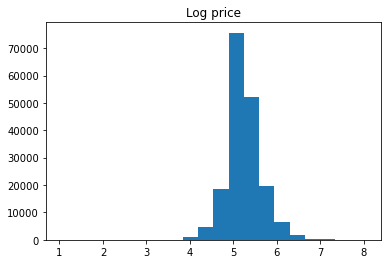

In [12]:
import matplotlib.pyplot as plt
import numpy as np
log_price = np.log10(df[df.price>10]['price']) 
plt.hist(log_price, bins=20)
plt.title("Log price")
plt.show()

9. Quizás title y description se pueden usar para completar los nulos de rooms, bedrooms, bathrooms, etc. 

In [13]:
df.title

0                                         Exclente lote !! 
1         Excelente cochera fija y cubierta en edificio ...
2                     Oficina comercial · 265m² · 2 Cochera
3             Importante Oficina en Micro centro de 150 m2.
4                                     Oficina - San Nicolas
                                ...                        
183805    PH 6 Ambientes c/cochera y terraza en Monte Ca...
183806    Casa impecable en venta en la mejor zona de  -...
183807    Impactante vista a los parques. 420 m2 con coc...
183808                              Departamento - Belgrano
183809    Edificio Comercial  en excelente zona de Paler...
Name: title, Length: 183810, dtype: object

In [14]:
df.description

0         Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...
1         Muy buena cochera, en el 4to piso en excelente...
2         Gran Oportunidad! Unica piso de oficinas de 26...
3         Importante  Oficina de de 150 m2 con palier pr...
4         VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...
                                ...                        
183805    Corredor Responsable: Rene Vera - CUCICBA 6778...
183806    Casa en pleno Belgrano R reciclada con excelen...
183807    Piso de 419 m2 en un emblemático edificio mode...
183808    Piso de 285mts, en la mejor zona de Belgrano.<...
183809    Edificio Comercial CON ENTRADA INDEPENDIENTE S...
Name: description, Length: 183810, dtype: object

**NULOS**

In [15]:
100*df.isna().sum()/len(df)

id                   0.000000
ad_type              0.000000
start_date           0.000000
end_date             0.000000
created_on           0.000000
lat                  6.228170
lon                  6.228170
l1                   0.000000
l2                   0.000000
l3                   1.004842
l4                  96.048637
l5                 100.000000
l6                 100.000000
rooms               15.303846
bedrooms            27.188945
bathrooms           13.556390
surface_total       33.133127
surface_covered     34.017736
price                1.845384
currency             1.998803
price_period        51.732768
title                0.000000
description          0.000000
property_type        0.000000
operation_type       0.000000
dtype: float64

**BARRIOS**

In [16]:
df.l3.value_counts(dropna=False) #hay que completar nulos en esta columna y establecer criterios para normalizar (centro/microcentro, las cañitas, etc)

Palermo                 25169
Belgrano                21369
Caballito               11090
Recoleta                10382
Villa Urquiza            8373
Almagro                  8272
Villa Crespo             8211
Barrio Norte             5259
Flores                   5199
Nuñez                    5153
Balvanera                4805
Colegiales               3854
San Nicolás              3607
San Cristobal            3451
Villa Devoto             3228
Saavedra                 3121
Puerto Madero            3075
San Telmo                2766
Villa del Parque         2702
Floresta                 2462
Boedo                    2448
Monserrat                2378
Retiro                   2361
Mataderos                2273
Barracas                 2254
Liniers                  2078
NaN                      1847
Parque Chacabuco         1804
Villa Pueyrredón         1700
Coghlan                  1681
Villa Luro               1677
Congreso                 1385
Parque Patricios         1311
Chacarita 

Todas las start date son iguales a las created_on, alguna de las dos está al pedo. 

In [17]:
df[df.start_date == df.created_on].shape

(183810, 25)

In [18]:
#993 casos en donde no tenemos superficie cubierta 
df[df.price.isna()].shape

(3392, 25)

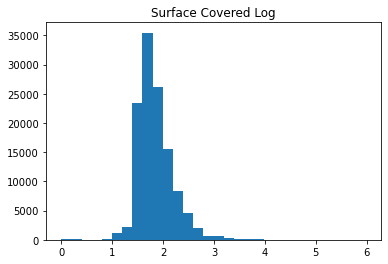

In [19]:
import matplotlib.pyplot as plt
import numpy as np
log_surface_cov = np.log10(df.surface_covered) 
plt.hist(log_surface_cov, bins=30)
plt.title("Surface Covered Log")
plt.show()

In [20]:
df.surface_covered.describe()

count    121282.000000
mean        148.706692
std        3064.441474
min           1.000000
25%          41.000000
50%          60.000000
75%         103.000000
max      950000.000000
Name: surface_covered, dtype: float64

In [21]:
df.surface_total.describe()

count    122908.00000
mean        174.63733
std        1461.00811
min          10.00000
25%          45.00000
50%          70.00000
75%         127.00000
max      140380.00000
Name: surface_total, dtype: float64

In [22]:
superficies = df.loc[df.surface_covered>df.surface_total, ['surface_covered','surface_total']]

In [23]:
superficies['dif'] = superficies.surface_covered - superficies.surface_total

In [24]:
superficies.dif.describe()

count       926.000000
mean       1443.682505
std       10151.407764
min           1.000000
25%           2.000000
50%          12.000000
75%          74.750000
max      169800.000000
Name: dif, dtype: float64

In [25]:
df.loc[df.surface_covered - df.surface_total>1000, :]

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
8659,+N5Ww6XIQ7+HKJ5boLqE1w==,Propiedad,2020-06-14,2020-06-16,2020-06-14,-34.672580,-58.493400,Argentina,Capital Federal,Villa Lugano,...,NaN,244.0,63229.0,190000.0,USD,NaN,Galpon de 1 ambiente en Venta en Villa lugano,Galpon en esquina lote propio de 244 metros. -...,Depósito,Venta
8660,7mrPqGNQOt/Q3nlhuLaHdg==,Propiedad,2020-06-14,2020-06-16,2020-06-14,-34.630927,-58.404756,Argentina,Capital Federal,Parque Patricios,...,NaN,850.0,86664.0,750000.0,USD,NaN,Galpon de 1 ambiente en Venta en Parque patricios,Espectacular galpón sobre Terreno Propio cerca...,Depósito,Venta
9226,A/VDp8Xk5Hhpph4SKqLC+g==,Propiedad,2020-05-25,2020-06-10,2020-05-25,-34.582435,-58.414845,Argentina,Capital Federal,Palermo,...,2.0,194.0,1994.0,495000.0,USD,Mensual,Departamento - Botanico,"Espectacular Vista Al Botánico - en Esquina, S...",Departamento,Venta
10626,oD9FsdrP2g/xGxUeEMx8Kw==,Propiedad,2020-07-01,2020-09-02,2020-07-01,-34.560649,-58.461678,Argentina,Capital Federal,Belgrano,...,NaN,37.0,3727.0,80000.0,USD,NaN,Venta-Local-Belgrano-Oportunidad,Corredor Responsable: Jorge Salafia - CUCICBA ...,Local comercial,Venta
13900,oJXjFIgMP0KzJDPDakU8Og==,Propiedad,2021-05-23,2021-06-04,2021-05-23,-34.632267,-58.479611,Argentina,Capital Federal,Floresta,...,NaN,1879.0,11796.0,1950000.0,USD,NaN,VENTA - LOTE NUEVA CONSTRUCCION - FLORESTA,Corredor Responsable: GABRIELA FERNANDEZ - CPI...,Lote,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175491,eG2WBTO0kXK6EzXPcZzUyA==,Propiedad,2020-06-27,2020-07-02,2020-06-27,-34.608859,-58.402845,Argentina,Capital Federal,Balvanera,...,1.0,50.0,4694.0,68200.0,USD,NaN,Venta departamento 3 ambientes,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento,Venta
175747,DozO3UQUbuNbJKjr9mmF6A==,Propiedad,2020-06-27,2020-07-02,2020-06-27,-34.577518,-58.434342,Argentina,Capital Federal,Palermo,...,2.0,970.0,8711.0,299000.0,USD,NaN,VENTA DEPARTAMENTO 4 AMBIENTES PALERMO,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento,Venta
176602,2cEKPSS4XK/BwSml+OuP5Q==,Propiedad,2021-02-08,9999-12-31,2021-02-08,-34.602386,-58.389382,Argentina,Capital Federal,Congreso,...,2.0,971.0,97130.0,2500000.0,USD,Mensual,Local - Congreso,Frente : 15.00 m<br><br>Fondo : 31.80 m <br>...,Local comercial,Venta
176692,KPC9D5IkuWdggIzFU4BmGQ==,Propiedad,2021-02-08,9999-12-31,2021-02-08,-34.604369,-58.378086,Argentina,Capital Federal,Centro / Microcentro,...,NaN,330.0,2500.0,1600000.0,USD,NaN,Terreno para inversión en microcentro,Corredor Responsable: Lucrecia Saulle - CSI 55...,Lote,Venta


In [26]:
df["created_on"].min(), df["created_on"].max()

('2020-05-24', '2021-06-17')